In [31]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

In [33]:
df = pd.read_csv("/content/drugg.csv")

In [34]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,for female with high bp and high cholestrol
1,47,M,LOW,HIGH,13.093,for male with low bp and high cholestrol
2,47,M,LOW,HIGH,10.114,for male with low bp and high cholestrol
3,28,F,NORMAL,HIGH,7.798,for female with normal bp and high cholestrol
4,61,F,LOW,HIGH,18.043,for female with high bp and high cholestrol


In [35]:
df.shape

(200, 6)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [37]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [38]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


<Axes: xlabel='BP', ylabel='count'>

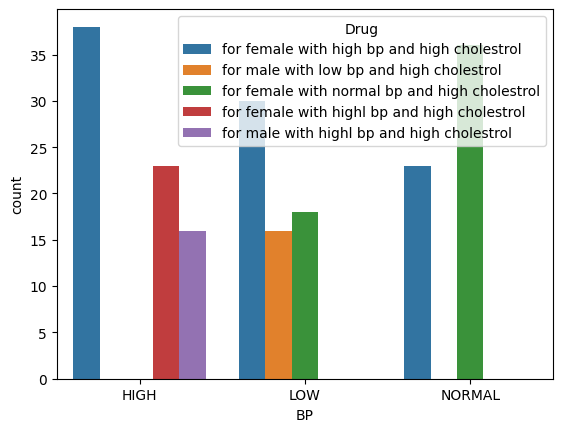

In [39]:
sns.countplot(data=df, x="BP", hue = "Drug")

<Axes: xlabel='Cholesterol', ylabel='count'>

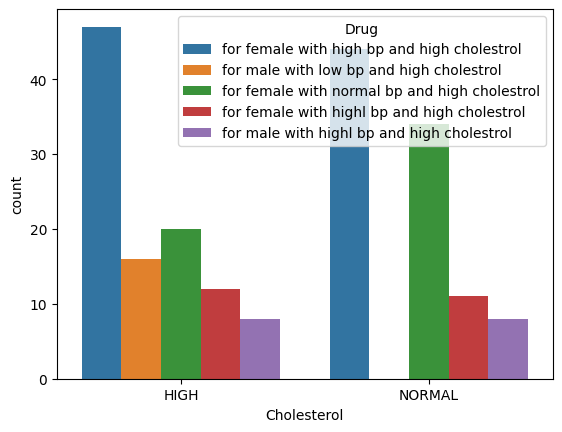

In [40]:
sns.countplot(data=df, x="Cholesterol", hue = "Drug")

<Axes: xlabel='Age', ylabel='Na_to_K'>

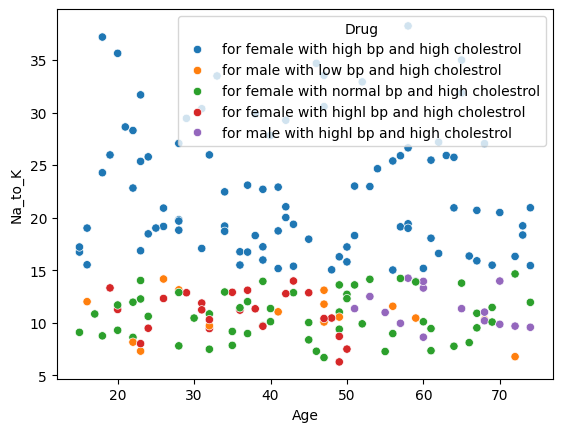

In [41]:
sns.scatterplot(data=df, x="Age", y = "Na_to_K", hue = "Drug")

In [42]:
LE = LabelEncoder()

In [43]:
df['New_Sex'] = LE.fit_transform(df['Sex']) #0=F, 1=M
df['New_BP'] = LE.fit_transform(df['BP']) #0=High, 1=Low, 2=Normal
df['New_Cholesterol'] = LE.fit_transform(df['Cholesterol']) #0=HIGH ,1=NORMAL

In [44]:
df.drop(['Sex','BP','Cholesterol'],axis = 1, inplace =True)

In [45]:
df.head()

,Age,Na_to_K,Drug,New_Sex,New_BP,New_Cholesterol
0,23,25.355,for female with high bp and high cholestrol,0,0,0
1,47,13.093,for male with low bp and high cholestrol,1,1,0
2,47,10.114,for male with low bp and high cholestrol,1,1,0
3,28,7.798,for female with normal bp and high cholestrol,0,2,0
4,61,18.043,for female with high bp and high cholestrol,0,1,0


In [46]:
x = df.drop('Drug', axis = 1)
y = df['Drug']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [48]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

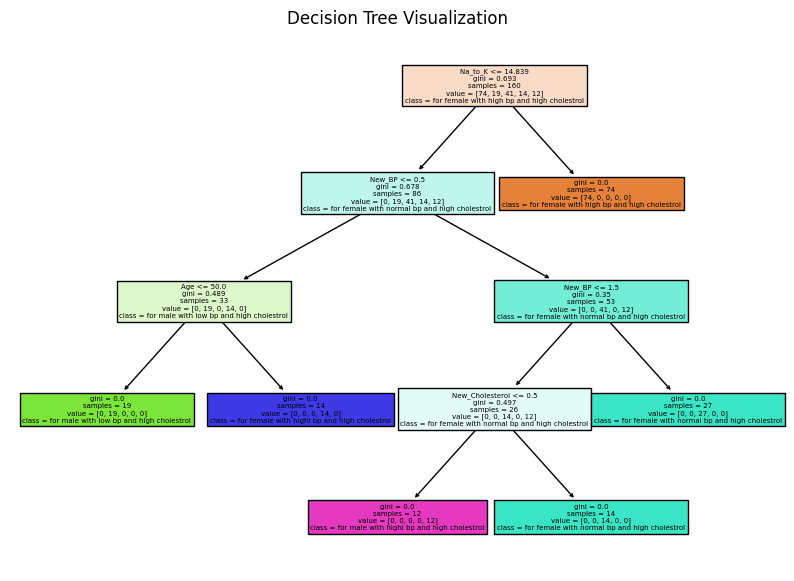

In [49]:
plt.figure(figsize=(10,7))
plot_tree(model, feature_names = x.columns, class_names = df['Drug'].unique(), filled = True)
plt.title("Decision Tree Visualization")
plt.show()

In [56]:
# create a new patient :
# Age : 23
# Na-to-K ratio : 25.355
# Sex : F = 0
# BP : High = 0
# Cholesterol : High = 0

model.predict([[28, 7.798, 0,3,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['for female with normal bp and high cholestrol'], dtype=object)